In [1]:
import pandas as pd
import numpy as np
import hickle as hkl

In [105]:
data10 = hkl.load("../../project-monitoring/tiles/1620/1075/raw/s2_10/1620X1075Y.hkl")
data20 = hkl.load("../../project-monitoring/tiles/1620/1075/raw/s2_20/1620X1075Y.hkl")
data20 = data20.repeat(2, axis = 1).repeat(2, axis = 2)

subtile = np.empty((data10.shape[0], data10.shape[1], data10.shape[2], 10))
subtile[..., :4] = data10
subtile[..., 4:] = data20

subtile = subtile.astype(np.float32)
subtile = subtile / 65535

In [107]:
b2 = subtile[..., 0]
b3 = subtile[..., 1]
b4 = subtile[..., 2]
b8 = subtile[..., 3]
b8a = subtile[..., 7]
b11 = subtile[..., 8]
b12 = subtile[..., 9]

mndwi = (b3 - b11) / (b3 + b11)
ndvi = (b8 - b4) / (b8 + b4)
tcb = ((0.3029 * b2) + (0.2786 * b3) + (0.47 * b4) + (0.5599 * b8a) +\
(0.508 * b11) + (0.1872 * b12))

print(mndwi.shape)
print(ndvi.shape)
def id_idx(x, y, mndwi, ndvi, tcb):
    
    ndwi_i = mndwi[:, x, y]
    ndvi_i = ndvi[:, x,  y]
    tcb_i = tcb[:, x, y]
    arg_ndvi = np.argmax(ndvi_i)
    arg_ndwi = np.argmax(ndwi_i)
    
    if ndwi_i[arg_ndvi] < -0.55 and (ndvi_i[arg_ndvi] - np.mean(ndvi_i)) < 0.05:
        idx = arg_ndvi
    elif ndvi_i[arg_ndwi] < -0.3 and (ndwi_i[arg_ndwi] - np.min(ndvi_i)) < 0.05:
        idx = arg_ndwi
    elif ndvi_i[arg_ndvi] > 0.6 and tcb_i[arg_ndvi] < 0.45:
        idx = arg_ndvi
    elif ndvi_i[arg_ndwi] < -0.2:
        idx = arg_ndwi
    elif tcb_i[np.argmin(ndvi_i)] > 0.45:
        idx = np.argmin(ndvi_i)
    else:
        idx = arg_ndvi
    return idx

stc = np.empty((data10.shape[1], data10.shape[2], 10))
for x in range(stc.shape[0]):
    for y in range(stc.shape[1]):
        idx = id_idx(x, y, mndwi, ndvi, tcb)
        if idx is not None:
            stc[x, y] = subtile[idx, x, y]
        

    

(5, 618, 614)
(5, 618, 614)


<AxesSubplot:>

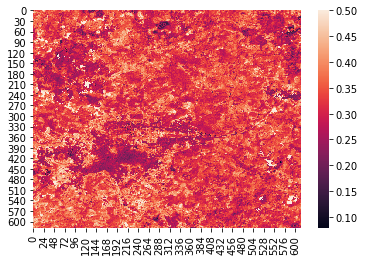

In [115]:
sns.heatmap(stc[..., 3], vmax = 0.5)

In [33]:
def argmax_lastNaxes(A, N):
    s = A.shape
    new_shp = s[:-N] + (np.prod(s[-N:]),)
    max_idx = A.reshape(new_shp).argmax(-1)
    return np.unravel_index(max_idx, s[-N:])


maxndvi = argmax_lastNaxes(ndvi, 2)

In [37]:
maxndvi[1].shape

(6,)

<AxesSubplot:>

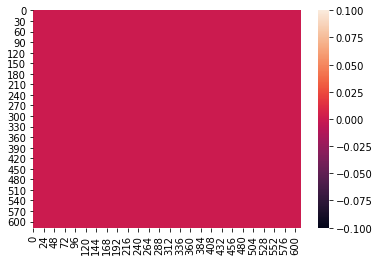

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(fourth_criteria)